![example](images/director_shot.jpeg)

# New Movie Studio Recommendations

**Authors:** Janice Teguh
***

## Overview

This project analyzes the recent landscape and trends of the movie industry to form recommendations for Microsoft's new movie studio. Descriptive analysis of box office data shows that there are correlations between the performance of a movie release with seasonality, popularity, and genre. Microsoft can use this analysis to adjust their planning of first movie release to improve chances of getting a box office/ high domestic and foreign gross.

## Business Problem

Microsoft is looking to expand their business into the movie industry, but lack the knowledge of the recent trends or landscape. This knowledge is essential for forming a strategy for a successful first movie release. Using box office and ratings data from The Numbers, Box Office Mojo, Rotten Tomatoes, and TheMovieDB, I describe correlations between seasonality, popularity, and genre of a movie with its performance in box office - which Microsoft can use in planning for their first movie.

## Data Understanding

- Data from The Numbers consists of movie id, release date, titles, production budget, domestic gross, worldwide gross
- Data from Box Office Mojo consists of movie title, studio, domestic gross, and foreign gross
- Data from Rotten Tomatoes (Info) consists of movie id, synopsis, rating, genre, director, writer, theater date, box office, runtime, studio
- Data from Rotten Tomatoes (Review) consists of movie id, review, rating, fresh, critic, top_critic, publisher, date
- Data from The Movie Database consists of genre ids, movie id, original language, original title, popularity, release date, title, vote average, vote count

The properties that I will focus on for this analysis are release season, domestic gross, foreign and worldwide gross, genre,  box office, and popularity.

In [65]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

%matplotlib inline

In [66]:
#load data from The Numbers
movie_budgets = pd.read_csv('./Data/tn.movie_budgets.csv')
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [67]:
#load data from Box Office Mojo
movie_gross = pd.read_csv('./Data/bom.movie_gross.csv')
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [68]:
#load data from Rotten Tomatoes movie info and reviews
movie_info = pd.read_csv('./Data/rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv('./Data/rt.reviews.tsv', sep='\t', encoding='windows-1252')

#for one movie id, there are a couple reviews. Need to merge reviews before merging rt_reviews with movie info

In [69]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [70]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [71]:
#load data from The Movie Database
tmdb_movies = pd.read_csv('./Data/tmdb.movies.csv')

In [72]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


## Data Preparation


In [73]:
#check for duplicates, resulting in no duplicates
movie_budgets = movie_budgets.loc[~movie_budgets.duplicated()]
movie_gross = movie_gross.loc[~movie_gross.duplicated()]
movie_info = movie_info.loc[~movie_info.duplicated()]
rt_reviews = rt_reviews.loc[~rt_reviews.duplicated()]
tmdb_movies = tmdb_movies.loc[~tmdb_movies.duplicated()]

In [132]:
#preparing_movie_budgets
#Set data type as date and time, convert data as required
movie_budgets["release_date"] = pd.to_datetime(movie_budgets["release_date"]) 
movie_budgets["year"] = movie_budgets["release_date"].dt.year.astype(int)
movie_budgets["month"] = movie_budgets["release_date"].dt.month.astype(int)

#rename movie column to title
movie_budgets = movie_budgets.rename(columns={"movie":"title"})
movie_budgets

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,year,month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018,12
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1999,4
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,7
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,9


In [75]:
#remove $ and comma from currency string
def convert_currency(string):
    string = string.strip('$')
    string = string.replace(',', '')

    return string

#convert any time/date or currency column to int64 dtype
def convert_column(column):
    column = column.map(lambda x: convert_currency(x))
    column = column.astype(float)
    return column

In [76]:
#only run this cell once
movie_budgets["production_budget"] = convert_column(movie_budgets["production_budget"])
movie_budgets["domestic_gross"] = convert_column(movie_budgets["domestic_gross"])
movie_budgets["worldwide_gross"] = convert_column(movie_budgets["worldwide_gross"])

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   year               5782 non-null   int64         
 7   month              5782 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 406.5+ KB


In [77]:
movie_budgets.isna().sum()

id                   0
release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
year                 0
month                0
dtype: int64

In [78]:
#preparing movie_gross
#there were 1350 NaN values in "Foreign Gross" column (almost 40%) - add value of 500 as outlier
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(value=500)
movie_gross["foreign_gross"] = [float(str(i).replace(",", "")) for i in movie_gross["foreign_gross"]]

#fill n/a values with median in domestic gross
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].fillna(value=movie_gross['domestic_gross'].median())

#rename N/A studios to "N/A"
movie_gross["studio"] = movie_gross["studio"].fillna(value="N/A")

movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.8+ KB


In [79]:
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [80]:
#preparing movie_info
# removed movies that didn't make box office
movie_info = movie_info.dropna(subset=['box_office'])
movie_info.isna().sum()

#remove runtime and theatre date column with N/A values
movie_info = movie_info.dropna(subset=['runtime', "theater_date"])

#drop irrelevant columns
movie_info = movie_info.drop(["dvd_date", "currency"], axis=1)

#filling N/A values in remaining columns with N/A
movie_info["director"] = movie_info["director"].fillna("Unknown")
movie_info["writer"] = movie_info["writer"].fillna("Unknown")
movie_info["studio"] = movie_info["studio"].fillna("Unknown")
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 1 to 1555
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            332 non-null    int64 
 1   synopsis      332 non-null    object
 2   rating        332 non-null    object
 3   genre         332 non-null    object
 4   director      332 non-null    object
 5   writer        332 non-null    object
 6   theater_date  332 non-null    object
 7   box_office    332 non-null    object
 8   runtime       332 non-null    object
 9   studio        332 non-null    object
dtypes: int64(1), object(9)
memory usage: 28.5+ KB


In [81]:
movie_info.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
box_office      0
runtime         0
studio          0
dtype: int64

In [82]:
movie_info["box_office"] = convert_column(movie_info["box_office"])

In [83]:
#prepare rt_reviews
rt_reviews.dropna(subset=["rating"], inplace=True)
rt_reviews.drop(["critic","publisher"],axis=1, inplace=True)

In [84]:
rt_reviews["review"] = rt_reviews["review"].fillna(value="No written review.")
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40907 entries, 0 to 54431
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          40907 non-null  int64 
 1   review      40907 non-null  object
 2   rating      40907 non-null  object
 3   fresh       40907 non-null  object
 4   top_critic  40907 non-null  int64 
 5   date        40907 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.2+ MB


In [85]:
rt_reviews.isna().sum()

id            0
review        0
rating        0
fresh         0
top_critic    0
date          0
dtype: int64

In [86]:
#create singular review number for each movie id in rotten tomatoes
review_letter = {"N":0.1, "R":1, "T":0.1, "F":0.1, "A":1, "B":0.75, "C":0.5, "D":0.25 }

def change(grade):
    if "/" in grade and " " not in grade:
        numbers = grade.split("/")
        result = float(numbers[0]) / float(numbers[1])
        return result
    elif grade[0] in "ABCDNRTF":
        result = float(review_letter[grade[0]])
        return result
    elif "." in grade:
        return round(float(grade))
    else:
        return 3
        
rt_reviews["fresh_number"] = rt_reviews["rating"].apply(lambda x: float(change(x)*10))
rt_reviews

,id,review,rating,fresh,top_critic,date,fresh_number
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,0,"November 10, 2018",6.0
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,0,"July 17, 2013",5.0
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,0,"April 21, 2013",4.0
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,0,"February 3, 2013",7.5
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,0,"January 15, 2013",5.0
...,...,...,...,...,...,...,...
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,1,"September 26, 2002",3.0
54428,2000,No written review.,1/5,rotten,0,"September 21, 2005",2.0
54429,2000,No written review.,2/5,rotten,0,"July 17, 2005",4.0
54430,2000,No written review.,2.5/5,rotten,0,"September 7, 2003",5.0


In [87]:
rt_reviews_numeric = rt_reviews.groupby("id").agg({"fresh_number":"mean"})
rt_reviews_numeric

,fresh_number
id,
3,6.369469
5,6.800000
6,5.890244
8,7.575000
10,6.487705
...,...
1996,6.436957
1997,5.945652
1998,6.000000


In [88]:
#merge rotten tomatoes info with rotten tomatoes reviews
rt_merge = movie_info.merge(rt_reviews_numeric, on="id")
rt_merge.sort_values(by="box_office",ascending=False,inplace=True)
rt_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 145 to 176
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            294 non-null    int64  
 1   synopsis      294 non-null    object 
 2   rating        294 non-null    object 
 3   genre         294 non-null    object 
 4   director      294 non-null    object 
 5   writer        294 non-null    object 
 6   theater_date  294 non-null    object 
 7   box_office    294 non-null    float64
 8   runtime       294 non-null    object 
 9   studio        294 non-null    object 
 10  fresh_number  294 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 27.6+ KB


In [89]:
rt_merge.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
box_office      0
runtime         0
studio          0
fresh_number    0
dtype: int64

In [90]:
#Set data type as date and time, convert data as required
tmdb_movies["release_date"] = pd.to_datetime(tmdb_movies["release_date"]) 
tmdb_movies["year"] = tmdb_movies["release_date"].dt.year.astype(int)
tmdb_movies["month"] = tmdb_movies["release_date"].dt.month.astype(int)
tmdb_movies.drop(["Unnamed: 0"], axis=1, inplace=True)
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
 9   year               26517 non-null  int64         
 10  month              26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 2.4+ MB


In [91]:
tmdb_movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
year                 0
month                0
dtype: int64

## Data Modeling

In [92]:
#find range of year reflected in movie
#sorted(movie_budgets["year"].unique())

#found that range of year is from 1915-2020

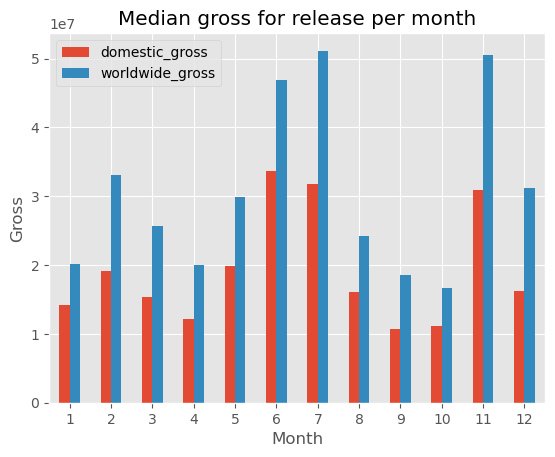

In [93]:
#plot domestic and worldwide gross against month that movie is released
df1 = movie_budgets.groupby(['month'])['domestic_gross'].median().to_frame()
df2 = movie_budgets.groupby(['month'])['worldwide_gross'].median().to_frame()


df1.merge(df2, how="inner", on="month").plot(kind="bar")
plt.xticks(rotation=0)
plt.ylabel("Gross")
plt.xlabel("Month")
plt.title("Median gross for release per month")
plt.savefig("./images/median_gross_for_release_per_month.png", dpi=150)
plt.show()

- Highest median for domestic gross is for releases in June, July, November. Roughly 100-150% more than other months.
- Highest median for worldwide gross is for releases in July, Nov, June. Roughly 150-250% more than other months.

/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


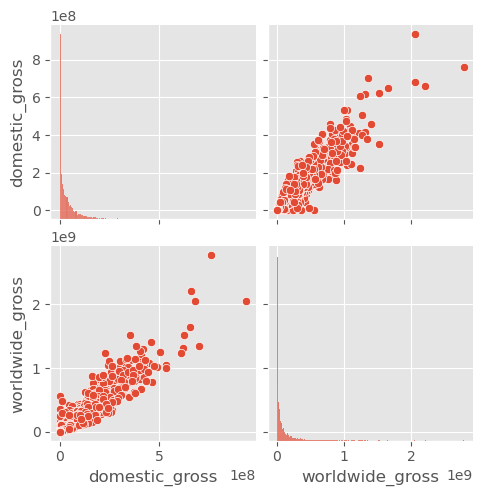

In [94]:
sns.pairplot(movie_budgets, vars=['domestic_gross','worldwide_gross'])

In [95]:
#find correlation matrix for numeric columns
df1 = movie_budgets.iloc[:, 3:6]
corr_matrix = df1.corr()
corr_matrix

,production_budget,domestic_gross,worldwide_gross
production_budget,1.000000,0.685682,0.748306
domestic_gross,0.685682,1.000000,0.938853
worldwide_gross,0.748306,0.938853,1.000000


- High domestic gross strongly correlates with high domestic gross (0.94).
- Production budget has quite strong correlation with domestic gross (0.69) and worldwide gross (0.748). 

In [96]:
#find overall domestic gross median from movie_gross dataset
total_domestic_gross_median = movie_gross["domestic_gross"].median()
total_domestic_gross_median

1400000.0

In [97]:
#find overall foreign gross median from movie_gross dataset
total_foreign_gross_median = movie_gross["foreign_gross"].median()
total_foreign_gross_median

1500000.0

In [98]:
#find studios with highest domestic gross
#dataframe of studio domestic gross median of all the movies they have made
studio_domestic_gross = movie_gross.groupby(['studio'])['domestic_gross'].median().to_frame(name = 'studio_domestic_gross').reset_index()

#look for studios which median is higher or equal to total domestic gross median of the whole industry (based on dataset)
studio_doing_well = studio_domestic_gross[studio_domestic_gross["studio_domestic_gross"] >= total_domestic_gross_median]

#number of studios "doing well"
len(studio_doing_well)

71

In [99]:
studio_doing_well = studio_doing_well.sort_values(by="studio_domestic_gross").set_index("studio")

In [100]:
studio_doing_well

,studio_domestic_gross
studio,
Myr.,1400000.0
AaF,1400000.0
PI,1400000.0
CF&SR,1500000.0
Yash,1600000.0
...,...
Sony,62000000.0
Fox,62150000.0
WB (NL),63100000.0


In [101]:
#do above process to find studios with highest foreign gross

#dataframe of studio foreign gross median of all the movies they have made
studio_foreign_gross = movie_gross.groupby(['studio'])['foreign_gross'].median().to_frame(name = 'studio_foreign_gross').reset_index()

#look for studios which median is higher or equal to total foreign gross median of the whole industry (based on dataset)
studio_doing_well_foreign = studio_foreign_gross[studio_foreign_gross["studio_foreign_gross"] >= total_foreign_gross_median]

#number of studios "doing well"
len(studio_doing_well_foreign)

74

In [102]:
studio_doing_well_foreign = studio_doing_well_foreign.sort_values(by="studio_foreign_gross", ascending=False).set_index("studio")

In [103]:
studio_doing_well_foreign

,studio_foreign_gross
studio,
HC,867600000.0
P/DW,341500000.0
GrtIndia,234000000.0
WAMCR,134950000.0
BV,122750000.0
...,...
PDA,2000000.0
Imag.,1927500.0
Argo.,1800000.0


In [104]:
#combine both dfs
high_earning = studio_doing_well.merge(studio_doing_well_foreign, how="inner", on="studio")
high_earning = high_earning.dropna()
high_earning

,studio_domestic_gross,studio_foreign_gross
studio,,
Myr.,1400000.0,1800000.0
PI,1400000.0,2100000.0
UHE,1700000.0,3200000.0
SV,1800000.0,23900250.0
Amazon,2500000.0,3700000.0
Spanglish,2600000.0,5200000.0
HC,2700000.0,867600000.0
PDA,3300000.0,2000000.0
U/P,3500000.0,2800000.0


In [105]:
high_earning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Myr. to P/DW
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studio_domestic_gross  47 non-null     float64
 1   studio_foreign_gross   47 non-null     float64
dtypes: float64(2)
memory usage: 1.1+ KB


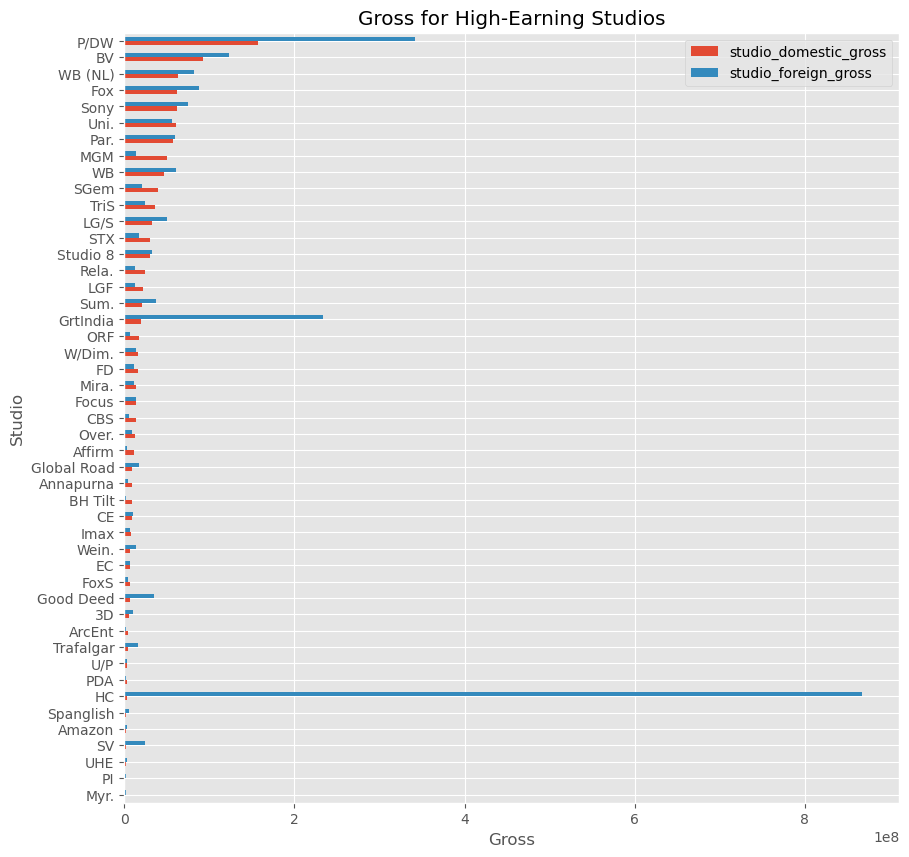

In [106]:
ax = high_earning.plot(kind="barh", figsize=(10,10))
plt.xticks(rotation=0)
plt.ylabel("Studio")
plt.xlabel("Gross")
plt.title("Gross for High-Earning Studios")
plt.savefig("./images/gross_for_high_earning_studios.png", dpi=150)
plt.show()

In [107]:
#How many movies did HC, GrtIndia, and P/DW released
movie_gross[movie_gross["studio"].isin(["HC","GrtIndia","P/DW"])]

,title,studio,domestic_gross,foreign_gross,year
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010
17,Megamind,P/DW,148400000.0,173500000.0,2010
71,Dinner for Schmucks,P/DW,73000000.0,13800000.0,2010
329,Transformers: Dark of the Moon,P/DW,352400000.0,771400000.0,2011
333,Kung Fu Panda 2,P/DW,165200000.0,500400000.0,2011
338,Puss in Boots,P/DW,149300000.0,405700000.0,2011
734,Madagascar 3: Europe's Most Wanted,P/DW,216400000.0,530500000.0,2012
752,Rise of the Guardians,P/DW,103400000.0,203500000.0,2012
865,A Thousand Words,P/DW,18500000.0,3600000.0,2012


- Foreign gross beating domestic very significantly for HC, GrtIndia, P/DW
- HC and GrtIndia only released one movie in the dataset, but highest foreign gross. May signify that number of movies released doesn't matter, but what matters is the size of the foreign market (Chinese and Indian population globally).

/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


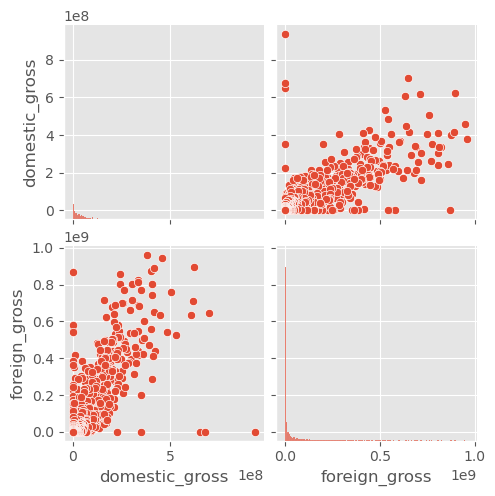

In [108]:
sns.pairplot(movie_gross, vars=['domestic_gross','foreign_gross'])

In [109]:
corr_matrix = movie_gross[['domestic_gross','foreign_gross']].corr()
corr_matrix

,domestic_gross,foreign_gross
domestic_gross,1.000000,0.792269
foreign_gross,0.792269,1.000000


High domestic gross strongly correlates with high foreign gross (0.79).

In [110]:
#calculate average box office in rotten tomatoes - merged
box_office_mean = rt_merge["box_office"].mean()
box_office_mean

39267772.11564626

In [111]:
#calculate average box office in rotten tomatoes - unmerged
box_office_mean_um = movie_info["box_office"].mean()
box_office_mean_um

38448641.415662654

In [112]:
#filter rt_merge to only have movies making above average
rt_merge = rt_merge[rt_merge["box_office"]>=box_office_mean]
rt_merge

,id,synopsis,rating,genre,director,writer,theater_date,box_office,runtime,studio,fresh_number
145,1071,This depiction of the last 12 hours in the lif...,R,Drama,Mel Gibson,Mel Gibson|Benedict Fitzgerald,"Feb 25, 2004",368000000.0,127 minutes,Newmarket Film Group,6.825676
156,1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,"Dec 14, 2012",303001229.0,170 minutes,Warner Bros.,6.984474
222,1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,Action and Adventure|Mystery and Suspense,Sam Mendes,John Logan|Robert Wade|Neal Purvis,"Nov 9, 2012",299300000.0,145 minutes,MGM,9.121392
123,883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,Comedy,Jay Roach,Jim Herzfeld|John Hamburg,"Dec 22, 2004",279167575.0,118 minutes,Universal Pictures,5.819915
205,1442,Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002",261835892.0,161 minutes,Warner Bros. Pictures,7.831126
...,...,...,...,...,...,...,...,...,...,...,...
1,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002",41032915.0,82 minutes,Paramount Pictures,6.487705
234,1598,Max Payne is a maverick cop - a mythic anti-he...,PG-13,Action and Adventure|Drama|Mystery and Suspense,Unknown,Beau Thorne,"Oct 17, 2008",40632110.0,100 minutes,20th Century Fox,4.220539
65,468,Television actor-turned-director Brian Robbins...,PG-13,Comedy|Drama,Brian Robbins,John Gatins,"Sep 14, 2001",39697363.0,115 minutes,Paramount Pictures,5.537736
261,1785,The director of Mortal Kombat (1995) adapts an...,R,Action and Adventure|Horror|Mystery and Suspense,Unknown,Unknown,"Mar 15, 2002",39532308.0,100 minutes,Columbia Tristar Pictures,4.905263


In [113]:
#filter movie_info to only have movies making above average
movie_info = movie_info[movie_info["box_office"]>=box_office_mean_um]
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,box_office,runtime,studio
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002",41032915.0,82 minutes,Paramount Pictures
16,23,A fictional film set in the alluring world of ...,R,Drama,Unknown,Unknown,"Dec 20, 2013",99165609.0,129 minutes,Sony Pictures
44,57,Life doesn't always go according to plan. Pat ...,R,Comedy,Unknown,Unknown,"Nov 21, 2012",132088910.0,122 minutes,The Weinstein Company
48,61,Death once again shows he's determined to get ...,R,Action and Adventure|Drama|Horror|Mystery and ...,James Wong,James Wong|Glen Morgan,"Feb 10, 2006",54100000.0,93 minutes,New Line Cinema
51,65,A classic Disney fairytale collides with moder...,PG,Comedy|Kids and Family|Romance,Kevin Lima,Unknown,"Nov 21, 2007",127706877.0,108 minutes,Walt Disney Pictures
...,...,...,...,...,...,...,...,...,...,...
1500,1932,A overgrown mama's boy who hasn't found the co...,PG-13,Comedy|Drama|Romance,Tom Dey,Unknown,"Mar 10, 2006",88658172.0,96 minutes,Paramount Pictures
1502,1935,"Director Alex Proyas (Dark City, The Crow) hel...",PG-13,Action and Adventure|Mystery and Suspense|Scie...,Alex Proyas,Akiva Goldsman|Jeff Vintar,"Jul 16, 2004",144738046.0,115 minutes,20th Century Fox
1510,1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011",98000000.0,119 minutes,Sony Pictures
1511,1945,"Left on a nun's doorstep, Larry, Curly and Moe...",PG,Comedy,Bobby Farrelly|Peter Farrelly,Bobby Farrelly|Peter Farrelly|Mike Cerrone,"Apr 13, 2012",41800000.0,92 minutes,20th Century Fox


In [133]:
rt_merge

,id,synopsis,rating,genre,director,writer,theater_date,box_office,runtime,studio,fresh_number
145,1071,This depiction of the last 12 hours in the lif...,R,Drama,Mel Gibson,Mel Gibson|Benedict Fitzgerald,"Feb 25, 2004",368000000.0,127 minutes,Newmarket Film Group,6.825676
156,1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,"Dec 14, 2012",303001229.0,170 minutes,Warner Bros.,6.984474
222,1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,Action and Adventure|Mystery and Suspense,Sam Mendes,John Logan|Robert Wade|Neal Purvis,"Nov 9, 2012",299300000.0,145 minutes,MGM,9.121392
123,883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,Comedy,Jay Roach,Jim Herzfeld|John Hamburg,"Dec 22, 2004",279167575.0,118 minutes,Universal Pictures,5.819915
205,1442,Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002",261835892.0,161 minutes,Warner Bros. Pictures,7.831126
...,...,...,...,...,...,...,...,...,...,...,...
1,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002",41032915.0,82 minutes,Paramount Pictures,6.487705
234,1598,Max Payne is a maverick cop - a mythic anti-he...,PG-13,Action and Adventure|Drama|Mystery and Suspense,Unknown,Beau Thorne,"Oct 17, 2008",40632110.0,100 minutes,20th Century Fox,4.220539
65,468,Television actor-turned-director Brian Robbins...,PG-13,Comedy|Drama,Brian Robbins,John Gatins,"Sep 14, 2001",39697363.0,115 minutes,Paramount Pictures,5.537736
261,1785,The director of Mortal Kombat (1995) adapts an...,R,Action and Adventure|Horror|Mystery and Suspense,Unknown,Unknown,"Mar 15, 2002",39532308.0,100 minutes,Columbia Tristar Pictures,4.905263


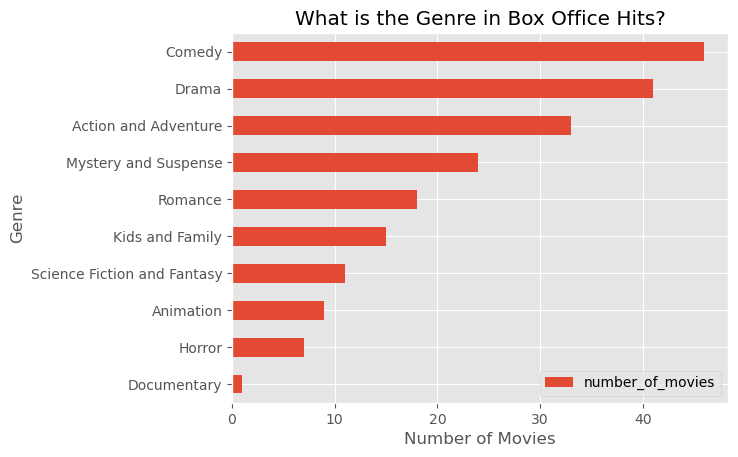

In [114]:
#calculate what genre appears most in box office tops - merged

genre_dict = {}

for genre in rt_merge["genre"]:
    movie_genres = genre.split("|")
    for movie_genre in movie_genres:
        if movie_genre not in genre_dict:
            genre_dict[movie_genre] = 1
        else:
            genre_dict[movie_genre] += 1

box_office_genre = pd.DataFrame.from_dict(genre_dict, orient='index',columns=["number_of_movies"])

df = box_office_genre.sort_values(by="number_of_movies")
df.plot(kind="barh")
plt.xticks(rotation=0)
plt.ylabel("Genre")
plt.xlabel("Number of Movies")
plt.title("What is the Genre in Box Office Hits?")
plt.savefig("./images/genre_in_box_office_hits.png", dpi=150)
plt.show()

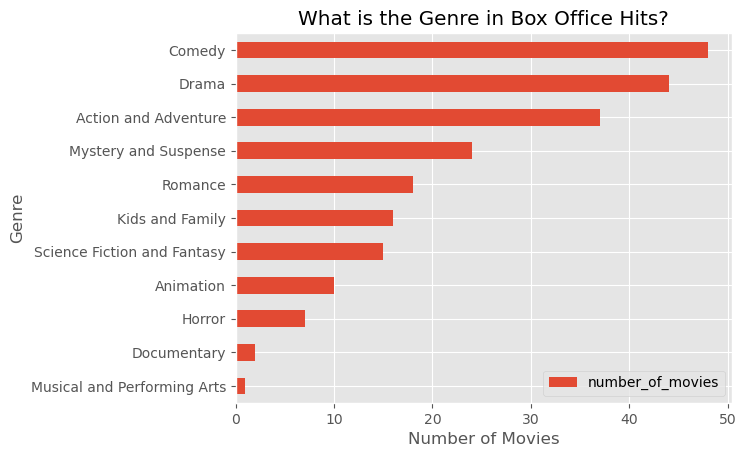

In [115]:
#calculate what genre appears most in box office tops - unmerged

genre_dict = {}

for genre in movie_info["genre"]:
    movie_genres = genre.split("|")
    for movie_genre in movie_genres:
        if movie_genre not in genre_dict:
            genre_dict[movie_genre] = 1
        else:
            genre_dict[movie_genre] += 1

box_office_genre = pd.DataFrame.from_dict(genre_dict, orient='index',columns=["number_of_movies"])

df = box_office_genre.sort_values(by="number_of_movies")
df.plot(kind="barh")
plt.xticks(rotation=0)
plt.ylabel("Genre")
plt.xlabel("Number of Movies")
plt.title("What is the Genre in Box Office Hits?")
plt.savefig("./images/genre_in_box_office_hits_unmerged.png", dpi=150)
plt.show()

- Genres that appear in most movies doing well in box office: Comedy, Drama, Action and Adventure - both in bigger and smaller sample sizes.

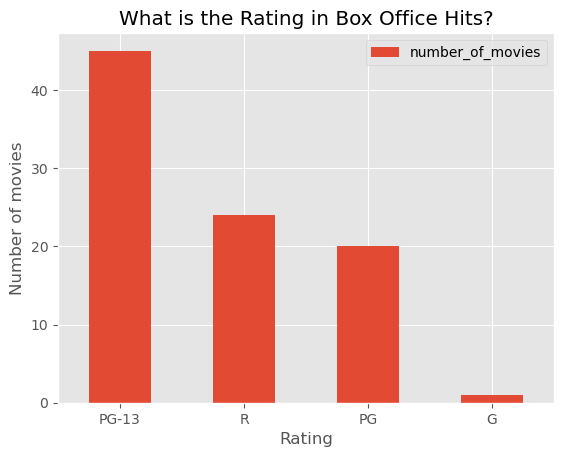

In [116]:
#from merged data
rating_dict = {}

for rating in rt_merge["rating"]:
    if rating not in rating_dict:
            rating_dict[rating] = 1
    else:
            rating_dict[rating] += 1

box_office_rating = pd.DataFrame.from_dict(rating_dict, orient='index',columns=["number_of_movies"])
df = box_office_rating.sort_values(by="number_of_movies", ascending=False)
df.plot(kind="bar")

plt.xticks(rotation=0)
plt.ylabel("Number of movies")
plt.xlabel("Rating")
plt.title("What is the Rating in Box Office Hits?")
plt.savefig("./images/rating_in_box_office_hits.png", dpi=150)
plt.show()

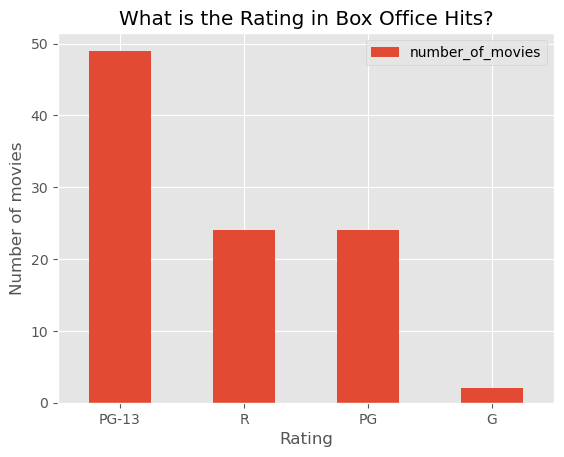

In [117]:
#from unmerged data
rating_dict = {}

for rating in movie_info["rating"]:
    if rating not in rating_dict:
            rating_dict[rating] = 1
    else:
            rating_dict[rating] += 1

box_office_rating = pd.DataFrame.from_dict(rating_dict, orient='index',columns=["number_of_movies"])
df = box_office_rating.sort_values(by="number_of_movies", ascending=False)
df.plot(kind="bar")

plt.xticks(rotation=0)
plt.ylabel("Number of movies")
plt.xlabel("Rating")
plt.title("What is the Rating in Box Office Hits?")
plt.savefig("./images/rating_in_box_office_hits_um.png", dpi=150)
plt.show()

Movies performing above average in box office usually has PG-13 ratings - both in bigger and smaller sample sizes. 

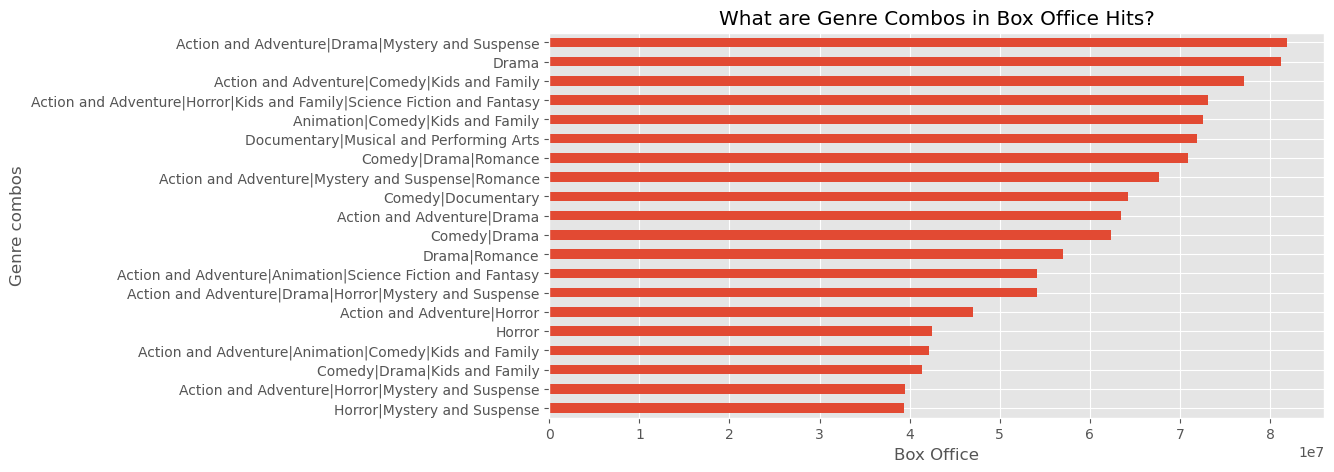

In [118]:
#combo of genres making top box office
ax = movie_info.groupby("genre")["box_office"].median().sort_values().head(20).plot(kind="barh",figsize=(10,5))
plt.xticks(rotation=0)
plt.ylabel("Genre combos")
plt.xlabel("Box Office")
plt.title("What are Genre Combos in Box Office Hits?")
plt.savefig("./images/genre_combos_in_box_office_hits.png", dpi=150)
plt.show()

- Action and Adventure, Drama, and Comedy appears the most in this combo plot

In [119]:
tmdb_movies = tmdb_movies.sort_values(by="popularity",ascending=False)
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,2018,4
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,2014,10
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,2018,12
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,2014,12
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,2012,5
...,...,...,...,...,...,...,...,...,...,...,...
13877,[10749],401741,en,Crème Caramel,0.600,2014-05-20,Crème Caramel,5.0,1,2014,5
13878,[878],401427,en,Elegy,0.600,2014-09-10,Elegy,5.0,1,2014,9
13879,[35],399054,en,Jaguar,0.600,2014-09-21,Jaguar,5.0,1,2014,9
13880,[],381154,en,Unleashed! A Dog Dancing Story,0.600,2014-02-13,Unleashed! A Dog Dancing Story,5.0,1,2014,2


In [120]:
genre_dict = {"28":  "Action", "12":  "Adventure", "16":  "Animation", "35":  "Comedy", "80":  "Crime", 
              "99":  "Documentary", "18":  "Drama", "10751":   "Family", "14":  "Fantasy", "36":  "History",
              "27":  "Horror", "10402":   "Music", "9648":    "Mystery", "10749":   "Romance",
              "878": "Science Fiction", "10770":   "TV Movie", "53":  "Thriller", "10752":   "War",
              "37":  "Western"}

In [ ]:
#use explode to open genres

In [121]:
def change_genres(x):
    genres = []
    genre_list = x.strip("]").strip("[").split(",")
    genre_list = [id.strip(" ") for id in genre_list]
    for genre in genre_list:
        if genre in genre_dict:
            genres.append(genre_dict[genre])
        else:
            genres.append("Other")
    return "|".join(genres)

In [122]:
tmdb_movies["genre"] = tmdb_movies["genre_ids"].apply(lambda x: change_genres(x))

In [123]:
popular_movies = tmdb_movies[tmdb_movies.popularity >= tmdb_movies["popularity"].mean()]
popular_movies = popular_movies.sort_values(by="popularity", ascending=False)
popular_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month,genre
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,2018,4,Adventure|Action|Fantasy
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,2014,10,Action|Thriller
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,2018,12,Action|Adventure|Animation|Science Fiction|Comedy
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,2014,12,Action|Adventure|Fantasy
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,2012,5,Science Fiction|Action|Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...
591,[18],44966,en,The Freebie,3.137,2010-09-17,The Freebie,4.8,12,2010,9,Drama
592,[18],39477,en,Small Town Saturday Night,3.136,2010-05-31,Small Town Saturday Night,6.2,17,2010,5,Drama
14981,"[80, 18, 53]",386465,en,Newcomer,3.135,2015-10-30,Newcomer,5.9,12,2015,10,Crime|Drama|Thriller
5826,"[99, 10402]",137563,en,A Band Called Death,3.133,2013-06-27,A Band Called Death,7.2,47,2013,6,Documentary|Music


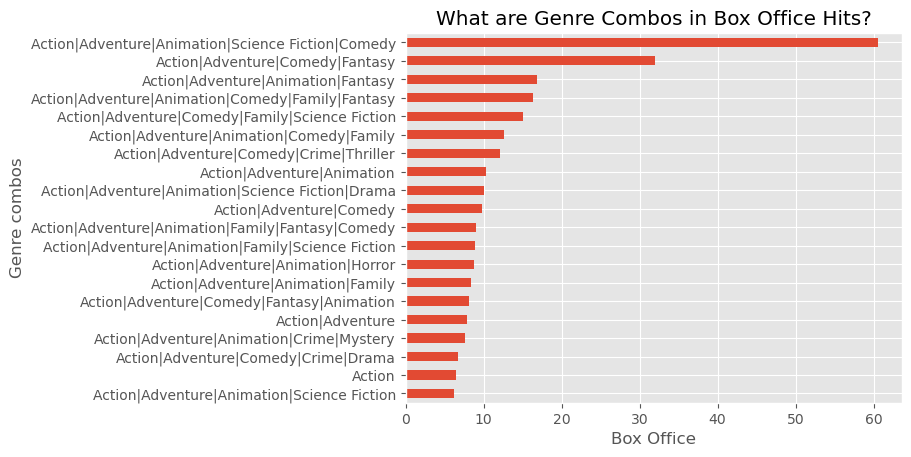

In [124]:
#combo of genres making a movie popular
ax = popular_movies.groupby("genre")["popularity"].median().head(20).sort_values().plot(kind="barh")

plt.xticks(rotation=0)
plt.ylabel("Genre combos")
plt.xlabel("Box Office")
plt.title("What are Genre Combos in Box Office Hits?")
plt.savefig("./images/genre_combos_in_box_office_hits_tmdb.png", dpi=150)
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'ascending'

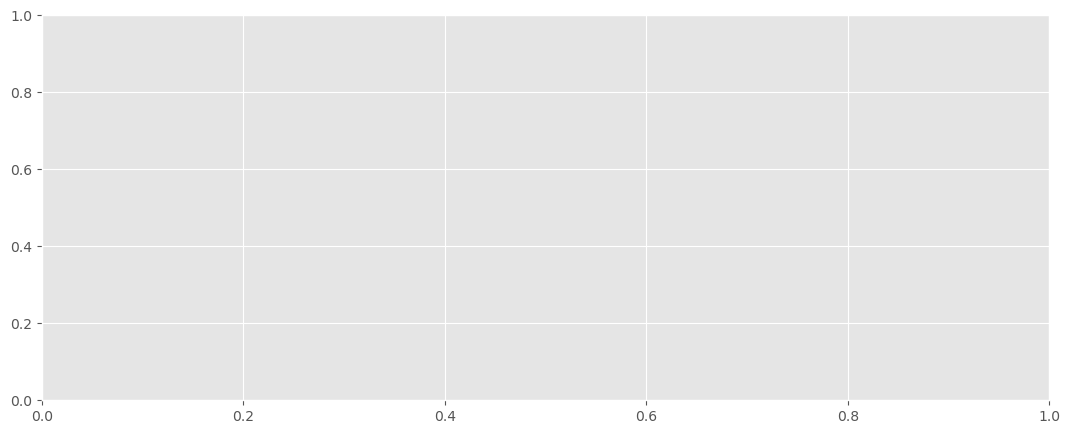

In [136]:
#individual genres in popular movies
genre_count = {}
genre_count["Action and Adventure"] = 0

for genre in popular_movies["genre"]:
    movie_genres = genre.split("|")
    for movie_genre in movie_genres:
        if movie_genre in ["Action","Adventure"]:
            genre_count["Action and Adventure"] += 1
        elif movie_genre not in genre_count:
            genre_count[movie_genre] = 1
        else:
            genre_count[movie_genre] += 1

popular_genre = pd.DataFrame.from_dict(genre_count, orient='index',columns=["number_of_movies"])
df = popular_genre.sort_values(by="number_of_movies")

df.plot(kind="bar", figsize=(13,5), ascending=False)
plt.xticks(rotation=0)
plt.ylabel("Genre")
plt.xlabel("Number of Movies")
plt.title("What is the Genre in Box Office Hits?")
plt.savefig("./images/genre_in_box_office_hits_tmdb.png", dpi=150)
plt.show()

Genres that appear in most movies doing well in box office: Comedy, Drama, Action and Adventure.

In [62]:
merge_A = popular_movies.merge(movie_gross, on="title")
merge_A.drop(["year_x"], axis=1, inplace=True)
merge_A.rename(columns={"year_y": "year"}, inplace=True)

In [63]:
corr_matrix = merge_A[["popularity","domestic_gross","foreign_gross", "month"]].corr()
corr_matrix

,popularity,domestic_gross,foreign_gross,month
popularity,1.000000,0.634081,0.620673,0.101050
domestic_gross,0.634081,1.000000,0.774173,0.067952
foreign_gross,0.620673,0.774173,1.000000,0.059967
month,0.101050,0.067952,0.059967,1.000000


/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/project1/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


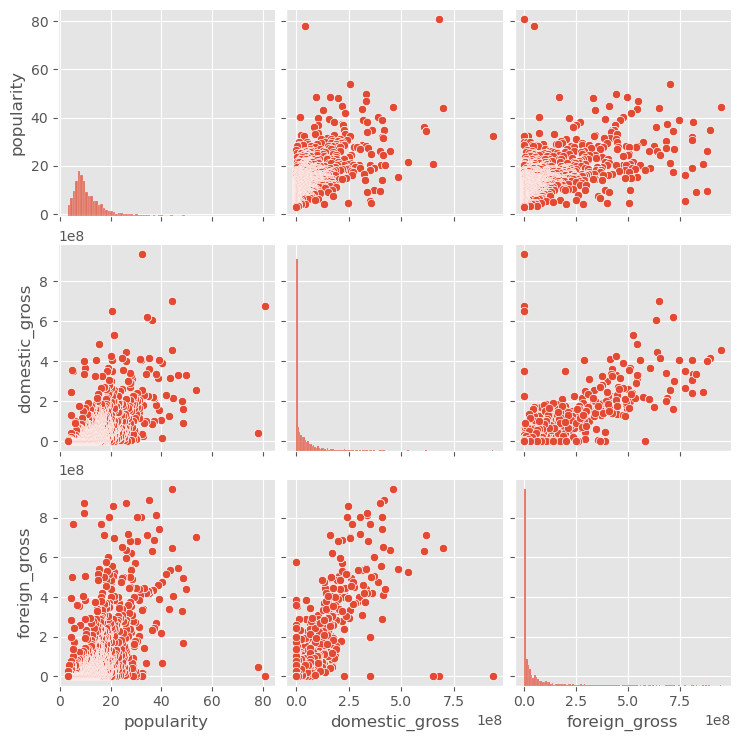

In [131]:
sns.pairplot(merge_A, vars=["popularity","domestic_gross","foreign_gross"])
plt.savefig("seaborn_plot.png")

Popularity has a quite high correlation to domestic gross and foreign gross domestic gross (0.6). 

## Evaluation


### Seasonality of movie release success
- Highest domestic gross median for movie releases is for releases in June, July, November. Roughly 100-150% more than other months.
- Highest worldwide gross median for movie releases is for releases in July, Nov, June. Roughly 150-250% more than other months.
- This is aligned with an industry phenomenon called "dump months". There are two times of the year when American filmmakers and distributors typically have lower commercial and critical expectations for new theatrical releases. During these periods, domestic audiences are generally smaller compared to the rest of the year. January and February are most often characterized this way, with August and September occasionally included.

### Genre of successful movies

- Genre of movies that are popular and/or make above average in box offices are Drama, Comedy, and Action and Adventure.
- Running data models on dataset from Rotten Tomatoes and TMDB generate the same results, although the users of these sites are quite different, which means that bias has been minimised.

> Rotten Tomatoes:

> - General Audience: Many casual moviegoers use Rotten Tomatoes to get a quick sense of a movie's quality through its aggregate score.
> - Critics and Reviewers: Professional critics often contribute reviews that form the basis of the Tomatometer score.
> - Industry Professionals: Filmmakers, marketers, and studios might use Rotten Tomatoes to gauge critical reception and audience response.

> TMDB (The Movie Database):

> - Film Enthusiasts and Hobbyists: TMDB users often include more dedicated movie and TV show fans who enjoy contributing to and maintaining a comprehensive database.
> - Developers and Tech-Savvy Users: TMDB offers a robust API that developers use to integrate movie and TV show data into their applications.
> - Content Creators and Researchers: People creating content or conducting research might use TMDB for its extensive and detailed information on movies, TV shows, actors, and crew members.

### Relationship between popularity/ market size with movie success
- Popularity has a quite high correlation to domestic gross and foreign gross domestic gross (0.6). This means that focusing on marketing is essential to increase popularity of the movie to increase viewing.
- From modelling The Numbers dataset, we see that the worldwide gross is always higher than domestic gross no matter the month. This is because the worldwide market size is always bigger than domestic.
- Therefore, in order to capture bigger box office earnings, look at ways to expand market for the movie. For example, foreign cultural references, foreign language subtitles, etc. Large markets include global Chinese and Indian viewers.


## Conclusions

### Recommendations
- Plan to release first movie in June, July, or November
- Pick main genre of movie to be Action and Adventure - there can be a combination with Drama or Comedy.
- Invest in marketing to boost popularity of movie before and during release. It is worth inserting cultural easter eggs or relatable references to capture large global markets, especially the Chinese and/or Indian populations.

### Future steps
- Determine causality between variables. Is it popular because it does well in the box office? Or is it making a hit in the box office because it is popular?
- Better modelling of content of individual movies that perform well on box office. Perhaps by scanning through movie synopses for common themes.
- Analyse what type of movies didn't do well in box office and why.